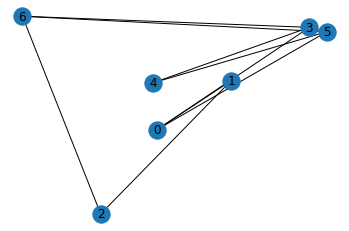

In [53]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

g = nx.Graph()
V = np.arange(7)
E = list()
V_pos = list()

# losowanie krawędzi
for v in V:
    for i in range(2):
        k = np.random.randint(0, len(V))
        if k != v:
            E.append([v, k])

# losowanie pozycji z przedziałów [0, 100], [0, 100]
for i in V:
    V_pos.append(np.random.randint(0, 100, 2))

g.add_nodes_from(V)
g.add_edges_from(E)
nx.draw_networkx_labels(g, V_pos)
nx.draw(g, V_pos)
plt.show()


Distance between: (0, 3)
57.8013840664737


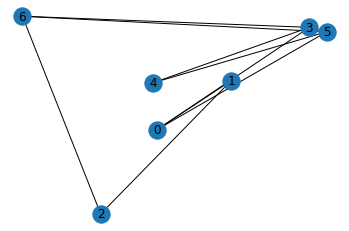

In [54]:
def euclides(a, b):
    return sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)


nodes_trv = []

def dist(v, w, grf):
    #print(grf.nodes)
    if w in grf.neighbors(v):
        return euclides(V_pos[v], V_pos[w])
    else:
        s_dist = list()
        new_g = grf.copy()
        new_g.remove_node(v)

        for s in grf.neighbors(v):
            nodes_trv.append([s, w])
            d = euclides(V_pos[v], V_pos[s]) + dist(s, w, new_g)
            print(v, s, w, d)
            s_dist.append(d)
            print('s_dist', s_dist)

        return min(s_dist, default=0)

print('Distance between:', (0, 3))
print(dist(0, 3, g))



nx.draw_networkx_labels(g, V_pos)
nx.draw(g, V_pos)
plt.show()